#One Hundred Years of US Baby Names

Bootcamp Project
June 30, 2020

Group
Dhara Bhansali
Sarah Grant
Keke Li
Matt Debnar

Overview


In [1]:
# Dependencies
#from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
#data source: https://www.kaggle.com/kaggle/us-baby-names
#import baby name data
baby_name_original = pd.read_csv(
    "Data/StateNames.csv", dtype="object", encoding="utf-8")
#display result
baby_name_original.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [3]:
#clean up column formats for Count (float), Year (int), convert year to date in new column date_conv (datetime)
baby_name_original["Count"] = baby_name_original.Count.astype(float)
baby_name_original["Year"] = baby_name_original["Year"].astype(int)
#alternative: change year into datetime if desired as new column date_conv
#baby_name_original['date_conv'] = pd.to_datetime(baby_name_original.Year)

In [4]:
#look for null values
baby_name_original.isnull().sum()

Id        0
Name      0
Year      0
Gender    0
State     0
Count     0
dtype: int64

In [5]:
#add a new column for Decade
baby_name_new = baby_name_original.copy()
baby_name_new.set_index('Id', inplace=True)
#baby_name_new["Year"] = baby_name_new["Year"].astype(int)
baby_name_new['Decade'] = ((baby_name_new['Year']//10)*10)
#baby_name_new = baby_name_new.reset_index(drop=True)
baby_name_new

,Name,Year,Gender,State,Count,Decade
Id,,,,,,
1,Mary,1910,F,AK,14.0,1910
2,Annie,1910,F,AK,12.0,1910
3,Anna,1910,F,AK,10.0,1910
4,Margaret,1910,F,AK,8.0,1910
5,Helen,1910,F,AK,7.0,1910
...,...,...,...,...,...,...
5647422,Seth,2014,M,WY,5.0,2010
5647423,Spencer,2014,M,WY,5.0,2010
5647424,Tyce,2014,M,WY,5.0,2010


In [6]:
#Define Region by State values
Northeast = ('CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA')
Midwest = ('IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD')
South = ('DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'AR', 'OK', 'TX')
West = ('AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA')


In [7]:
#add column Region and assign based on region-state values
baby_name_new["Region"] = np.where(baby_name_new["State"].isin(Northeast), "Northeast", 
         (np.where(baby_name_new["State"].isin(South), "South",
            (np.where(baby_name_new["State"].isin(West), "West",
                (np.where(baby_name_new["State"].isin(Midwest), "Midwest", "Unknown")))))))

#confirm 4 regions across all data
baby_name_new.nunique()

Name      30274
Year        105
Gender        2
State        51
Count      4944
Decade       11
Region        4
dtype: int64

In [8]:
#find any Unkown regions to bug fix Region States
baby_unknown = baby_name_new.loc[baby_name_new["Region"] == "Unknown", :]
baby_unknown

,Name,Year,Gender,State,Count,Decade,Region
Id,,,,,,,


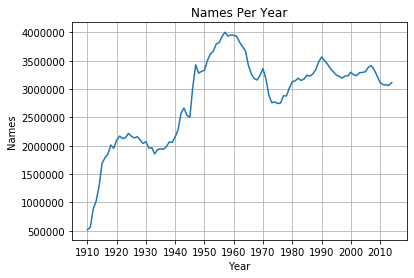

<Figure size 1080x720 with 0 Axes>

In [18]:
#summarize names per year
years = list(range(1910, 2011, 10))
plt.plot(baby_name_original.groupby(['Year']).agg({'Count':np.sum}))
plt.title("Names Per Year")
plt.xlabel('Year')
plt.ylabel('Names')
plt.xticks(years)
plt.grid()
plt.figure(figsize=(15,10))
plt.savefig(f'Output/Names Per Year.png')

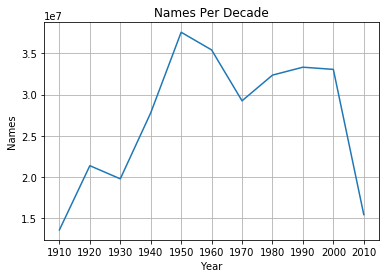

<Figure size 1080x720 with 0 Axes>

In [17]:
#optional names by Decade
years = list(range(1910, 2011, 10))
plt.plot(baby_name_new.groupby(['Decade']).agg({'Count':np.sum}))
plt.title("Names Per Decade")
plt.xlabel('Year')
plt.ylabel('Names')
plt.xticks(years)
plt.grid()
plt.figure(figsize=(15,10))
plt.savefig(f'Output/Names Per Decade.png')

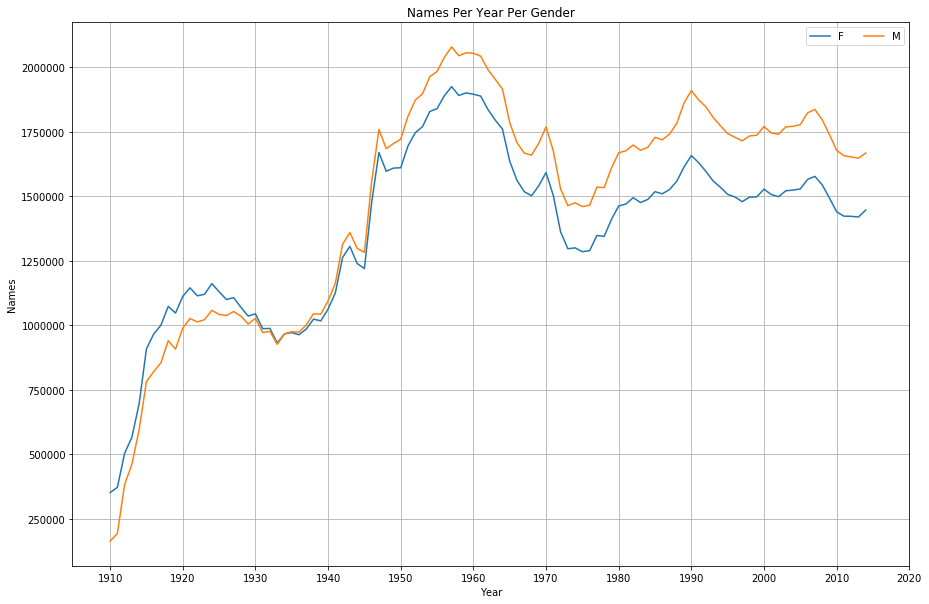

In [19]:
GenderNameGB = baby_name_new.groupby(['Year', 'Gender'])['Count'].sum()
GenderNameGBDF = pd.DataFrame(GenderNameGB)
GenderNameGBDF
GenderNameGBDF.rename(index={0: "Year", 1: "Gender", 2: "Count"})
GenderNameGBDFX = GenderNameGBDF.unstack()
GenderNameGBDFX.columns = GenderNameGBDFX.columns.droplevel()
GenderNameGBDFX
multi_plot = GenderNameGBDFX.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("Names Per Year Per Gender")
multi_plot.set_xlabel('Year')
multi_plot.set_ylabel('Names')
multi_plot.legend(ncol=2)
years = list(range(1910, 2021, 10))
plt.xticks(years)
plt.grid()
plt.savefig(f'Output/Names Per Gender.png')

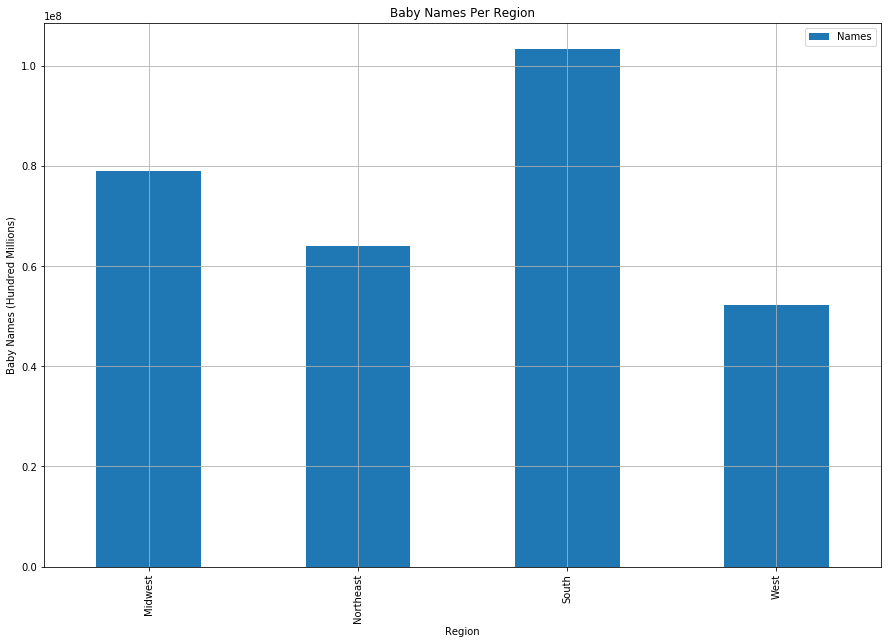

In [20]:
babyRegion = baby_name_new.groupby("Region")

Region = babyRegion.count().index
RegionNames = babyRegion['Count'].sum()

regionSummary = pd.DataFrame({"Region": Region, "Names": RegionNames,
                             })
regionSummary.set_index('Region', inplace=True)

multi_plot = regionSummary.plot(kind="bar", figsize=(15, 10))
plt.title(f"Baby Names Per Region")
plt.grid()
plt.xlabel("Region")
plt.ylabel("Baby Names (Hundred Millions)")
plt.savefig(f'Output/Names Per Region.png')

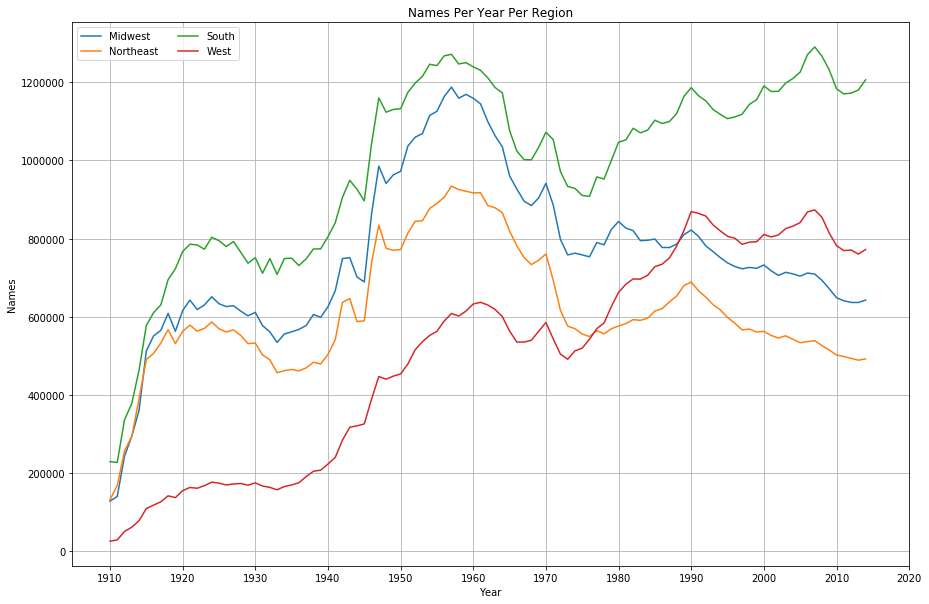

In [21]:
#names per region over time
RegionNameGB = baby_name_new.groupby(['Year', 'Region'])['Count'].sum()
RegionNameGBDF = pd.DataFrame(RegionNameGB)
RegionNameGBDF
RegionNameGBDF.rename(index={0: "Year", 1: "Region", 2: "Count"})
RegionNameGBDFX = RegionNameGBDF.unstack()
RegionNameGBDFX.columns = RegionNameGBDFX.columns.droplevel()
RegionNameGBDFX
multi_plot = RegionNameGBDFX.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("Names Per Year Per Region")
multi_plot.set_xlabel('Year')
multi_plot.set_ylabel('Names')
multi_plot.legend(ncol=2)
years = list(range(1910, 2021, 10))
plt.xticks(years)
plt.grid()
plt.savefig(f'Output/Names Per Year Per Region.png')

In [22]:
#group by Name to find popular names
BabyNameGB = baby_name_original.groupby("Name")
BabyName = BabyNameGB.count().index
NameCount = BabyNameGB["Count"].sum()

TopNameGB = pd.DataFrame({"Name": BabyName, "Popularity": NameCount
                             })
#sort names by popularity
TopName = TopNameGB.sort_values(by=['Popularity'], ascending=False)
TopName.head(10)

,Name,Popularity
Name,,
James,James,4957166.0
John,John,4845414.0
Robert,Robert,4725713.0
Michael,Michael,4312975.0
William,William,3839236.0
Mary,Mary,3740495.0
David,David,3562278.0
Richard,Richard,2534949.0
Joseph,Joseph,2485220.0
